In [1]:
import os

import numpy as np
import math
import uproot as uproot
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import gridspec



In [2]:
venv_path = os.getenv("PATH")
mcnudf = pd.read_hdf('../../test_mcnu.df', key='mcnu')
hdrdf = pd.read_hdf('../../test_mcnu.df', key='hdr')

In [3]:
hdrdf

,pot,first_in_subrun,ismc,run,subrun,ngenevt,evt,proc,cluster,fno
entry,,,,,,,,,,
0,1.375243e+18,1,1,1,79,100,1,0,60871736,0
1,0.000000e+00,0,1,1,79,100,2,0,60871736,0
2,0.000000e+00,0,1,1,79,100,3,0,60871736,0
3,0.000000e+00,0,1,1,79,100,4,0,60871736,0
4,0.000000e+00,0,1,1,79,100,5,0,60871736,0
...,...,...,...,...,...,...,...,...,...,...
2400,0.000000e+00,0,1,1,94,100,96,0,60871736,24
2401,0.000000e+00,0,1,1,94,100,97,0,60871736,24
2402,0.000000e+00,0,1,1,94,100,98,0,60871736,24


In [9]:
this_pot = hdrdf.pot[0]
print(this_pot)
target_POT = 3.0e20
POT_scale = target_POT / this_pot
print(POT_scale)

1.3752428e+18
218.14330506172047


In [6]:
mcnudf

E      time  bjorkenX inelasticityY        Q2  \
                                                                               
                                                                               
entry rec.mc.nu..index                                                         
0     0                 0.425876  1.665044  0.536435      0.601599  0.258086   
1     0                 1.356468  1.510859  0.362159      0.432521  0.399001   
2     0                 1.210015  0.729634  0.509184      0.439985  0.509051   
3     0                 1.251102  0.431338  0.942879      0.619300  1.371854   
4     0                 1.545147  0.855803  0.064010      0.720988  0.133906   
...                          ...       ...       ...           ...       ...   
2400  0                 1.877336  0.377864  0.818499      0.524420  1.513204   
2401  0                 0.333778  0.680517  0.228322      0.346570  0.049597   
2402  0                 2.785458  1.550672  0.137471      0.424817  0.305469   
2403  0                 0.802617  0.447902  0.722721      0.653964  0.712346   
2404  0                 2.674591  0.779233  0.893166      0.344916  1.547252   

                               w  momentum                        position  \
                                         x         y         z           x   
                                                                             
entry rec.mc.nu..index                                                       
0     0                 1.050998  0.019016 -0.009071  0.425355  138.814148   
1     0                 1.258689 -0.000189 -0.012307  1.356412  -75.310745   
2     0                 1.171433 -0.017574  0.016842  1.209770 -193.281494   
3     0                 0.982180  0.009040  0.005972  1.251055   13.156266   
4     0                 1.685122  0.000866  0.001716  1.545146  -68.146996   
...                          ...       ...       ...       ...         ...   
2400  0                 1.103231  0.025012  0.022566  1.877033   33.429691   
2401  0                 1.024302  0.002729 -0.005489  0.333722  -16.778326   
2402  0                 1.672771  0.009646  0.059751  2.784801  -16.278196   
2403  0                 1.074648  0.003491 -0.014398  0.802480  -83.505005   
2404  0                 1.032782  0.054586  0.002111  2.674033  102.080101   

                        ...         p                                  \
                        ...      genp                           start   
                        ...         x         y         z           x   
entry rec.mc.nu..index  ...                                             
0     0                 ...  0.089970 -0.141066  0.671289  138.814148   
1     0                 ... -0.198387 -0.102527  0.205977  -75.310745   
2     0                 ...  0.571114  0.146672  0.313512 -193.281494   
3     0                 ... -0.013796 -0.290831  1.058041   13.156266   
4     0                 ... -0.211590  0.291501  0.220262  -68.146996   
...                     ...       ...       ...       ...         ...   
2400  0                 ...  0.154590 -0.353517  0.589959   33.429691   
2401  0                 ... -0.100105 -0.101256 -0.172167  -16.778326   
2402  0                 ...       NaN       NaN       NaN         NaN   
2403  0                 ... -0.049216  0.393890  0.993711  -83.505005   
2404  0                 ... -0.495082 -0.033458  0.307776  102.080101   

                                                                        \
                                                       end               
                                 y           z           x           y   
entry rec.mc.nu..index                                                   
0     0                -120.764114  305.745361  143.039856 -125.264145   
1     0                 -96.023666  207.723389  -76.707901  -96.770676   
2     0                  76.835587   59.360367 -181.986694   79.526543   
3     0                  58.659328  240.72608

In [7]:
mcnudf.columns

MultiIndex([(            'E',       '',  ''),
            (         'time',       '',  ''),
            (     'bjorkenX',       '',  ''),
            ('inelasticityY',       '',  ''),
            (           'Q2',       '',  ''),
            (            'w',       '',  ''),
            (     'momentum',      'x',  ''),
            (     'momentum',      'y',  ''),
            (     'momentum',      'z',  ''),
            (     'position',      'x',  ''),
            (     'position',      'y',  ''),
            (     'position',      'z',  ''),
            (          'pdg',       '',  ''),
            (         'iscc',       '',  ''),
            (   'genie_mode',       '',  ''),
            (   'parent_pdg',       '',  ''),
            ( 'parent_dcy_E',       '',  ''),
            ('max_proton_ke',       '',  ''),
            (           'nn',       '',  ''),
            (           'np',       '',  ''),
            (          'nmu',       '',  ''),
            (          'npi',     

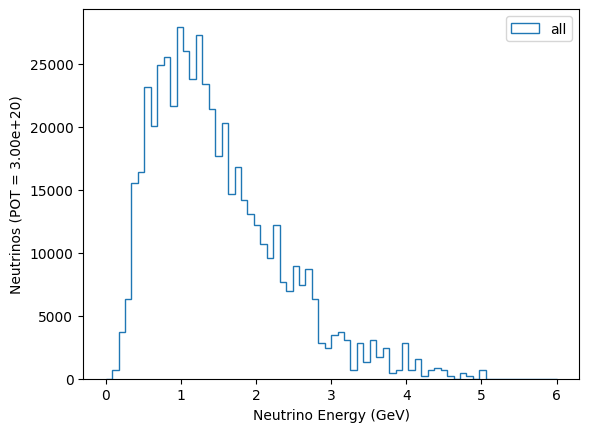

In [ ]:
# Draw a plot
var = mcnudf.E 
plt.hist(var, bins=np.linspace(0., 6., 71), weights=[np.ones_like(data) * POT_scale for data in var], histtype="step", label=["all"])
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel(f"Neutrinos (POT = {target_POT:.2e})")
plt.legend()
plt.show()

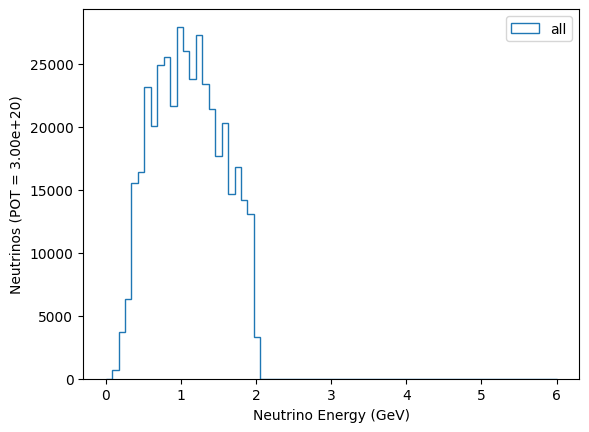

In [12]:
# apply an event selection
mcnudf_E_less_2 = mcnudf[mcnudf.E < 2.0]

var = mcnudf_E_less_2.E 
plt.hist(var, bins=np.linspace(0., 6., 71), weights=[np.ones_like(data) * POT_scale for data in var], histtype="step", label=["all"])
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel(f"Neutrinos (POT = {target_POT:.2e})")
plt.legend()
plt.show()